# Preprocessing & Visualization

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Embedding,SimpleRNN,LSTM,Bidirectional,GRU
from tensorflow.keras.optimizers import Adam
import pickle
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df=pd.read_csv("/content/bbc-text.csv")
df.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [ ]:
print('Number of rows : ',df.shape[0])
print('Number of coluns : ',df.shape[1])

Number of rows :  2225
Number of coluns :  2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [ ]:
df.describe(exclude=[np.number]).T

,count,unique,top,freq
category,2225,5,sport,511
text,2225,2126,blind student hears in colour a blind studen...,2


In [ ]:
df.duplicated().sum()

np.int64(99)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isna().sum()

,0
category,0
text,0


In [ ]:
def preprocessing(text):
  text=re.sub('[^a-zA-Z0-9]',' ',text)
  text=text.lower().split()
  text=[word for word in text if word not in stopwords.words('english')]
  text=" ".join(text)
  return text

In [ ]:
df['article']=df['text'].apply(preprocessing)

In [ ]:
df=df.drop('text',axis=1)

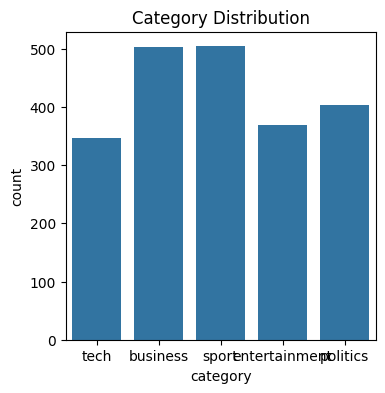

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(x='category',data=df)
plt.title('Category Distribution')
plt.show()

In [ ]:
sport_category=df[df.category =='sport']
sport_category.head()

,category,article
2,sport,tigers wary farrell gamble leicester say rushe...
3,sport,yeading face newcastle fa cup premiership side...
7,sport,henman hopes ended dubai third seed tim henman...
8,sport,wilkinson fit face edinburgh england captain j...
14,sport,moya emotional davis cup win carlos moya descr...


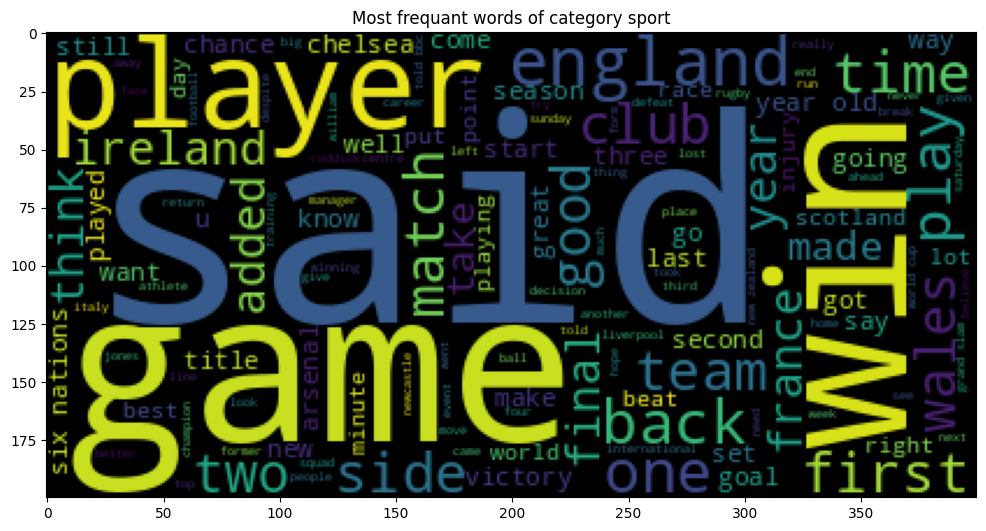

In [ ]:
text_combined=" ".join(sport_category['article'])
plt.figure(figsize=(12,12))
wordcloud=WordCloud(background_color='black', mode='RGBA').generate(text_combined)
plt.imshow(wordcloud,interpolation=None)
plt.axis=('off')
plt.title('Most frequant words of category sport')
plt.show()

In [ ]:
business_category=df[df.category =='business']
business_category.head()


,category,article
1,business,worldcom boss left books alone former worldcom...
11,business,virgin blue shares plummet 20 shares australia...
12,business,crude oil prices back 50 cold weather across p...
15,business,korean credit card firm rescued south korea la...
18,business,japanese banking battle end japan sumitomo mit...


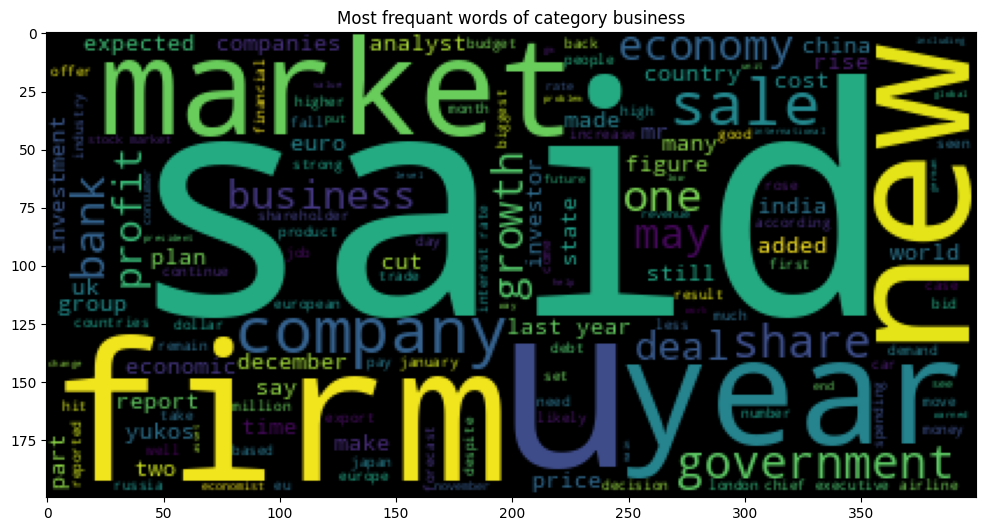

In [ ]:
text_combined=" ".join(business_category['article'])
plt.figure(figsize=(12,12))
wordcloud=WordCloud(background_color='black', mode='RGBA').generate(text_combined)
plt.imshow(wordcloud,interpolation=None)
plt.axis=('off')
plt.title('Most frequant words of category business')
plt.show()

In [ ]:
politics_category=df[df.category =='politics']
politics_category.head()

,category,article
5,politics,howard hits back mongrel jibe michael howard s...
6,politics,blair prepares name poll date tony blair likel...
13,politics,hague given pm ambition former conservative le...
16,politics,howard backs stem cell research michael howard...
28,politics,terror suspects face house arrest uk citizens ...


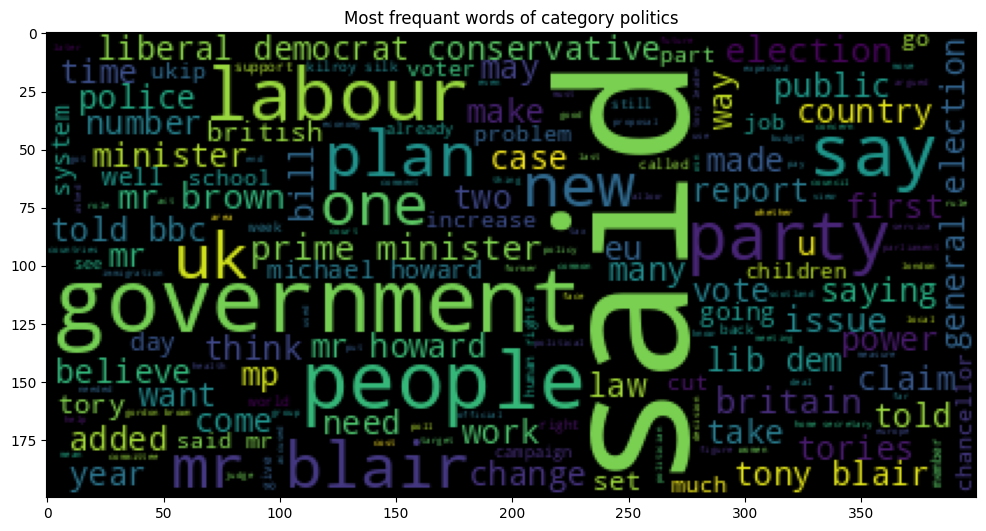

In [ ]:
text_combined=" ".join(politics_category['article'])
plt.figure(figsize=(12,12))
wordcloud=WordCloud(background_color='black', mode='RGBA').generate(text_combined)
plt.imshow(wordcloud,interpolation=None)
plt.axis=('off')
plt.title('Most frequant words of category politics')
plt.show()

In [ ]:
tech_category=df[df.category =='tech']
tech_category.head()

,category,article
0,tech,tv future hands viewers home theatre systems p...
19,tech,games maker fights survival one britain larges...
20,tech,security warning fbi virus us federal bureau i...
21,tech,halo 2 heralds traffic explosion growing popul...
24,tech,mobile audio enters new dimension mobile phone...


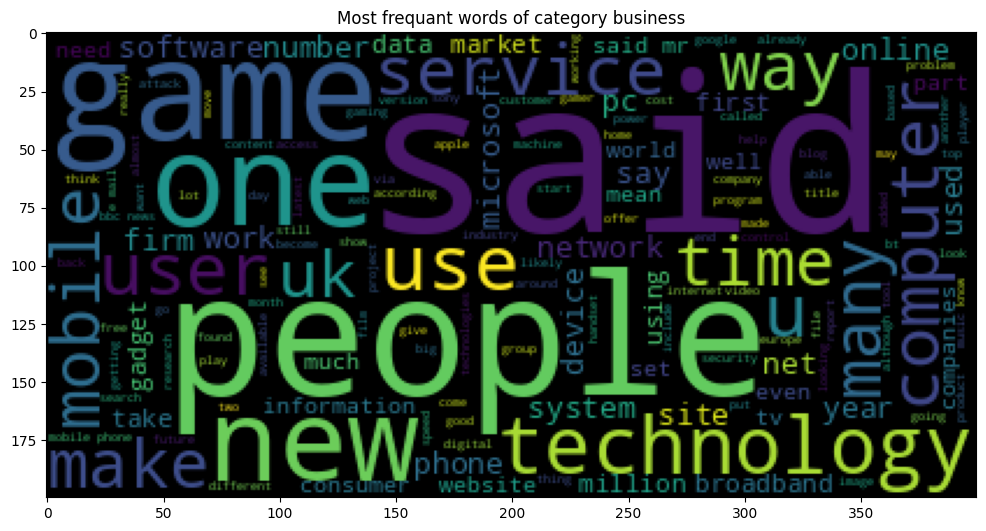

In [ ]:
text_combined=" ".join(tech_category['article'])
plt.figure(figsize=(12,12))
wordcloud=WordCloud(background_color='black', mode='RGBA').generate(text_combined)
plt.imshow(wordcloud,interpolation=None)
plt.axis=('off')
plt.title('Most frequant words of category business')
plt.show()

In [ ]:
entertainment_category=df[df.category =='entertainment']
entertainment_category.head()

,category,article
4,entertainment,ocean twelve raids box office ocean twelve cri...
9,entertainment,last star wars children sixth final star wars ...
10,entertainment,berlin cheers anti nazi film german movie anti...
26,entertainment,career honour actor dicaprio actor leonardo di...
29,entertainment,halloween writer debra hill dies screenwriter ...


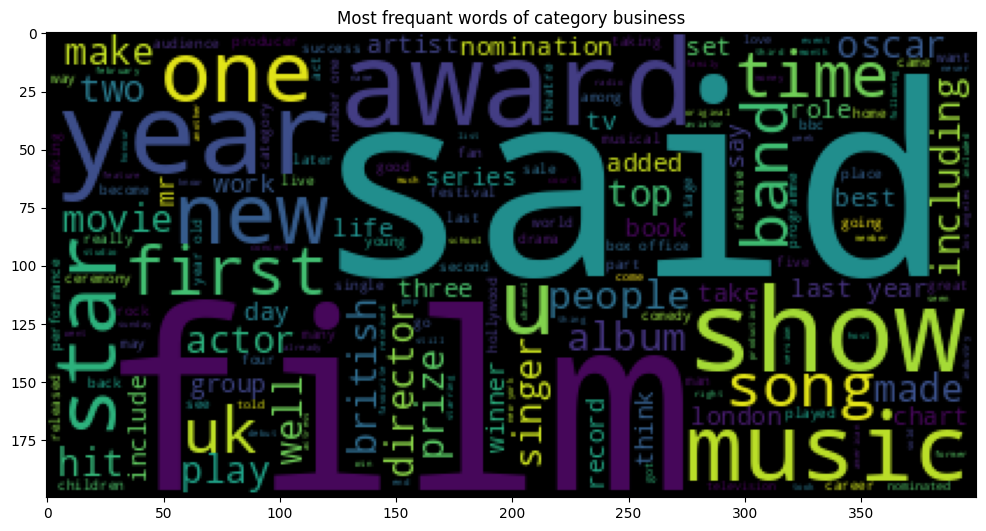

In [ ]:
text_combined=" ".join(entertainment_category['article'])
plt.figure(figsize=(12,12))
wordcloud=WordCloud(background_color='black', mode='RGBA').generate(text_combined)
plt.imshow(wordcloud,interpolation=None)
plt.axis=('off')
plt.title('Most frequant words of category business')
plt.show()

In [ ]:
df['category'].replace(
    {
        'sport':0,
        'business':1,
        'politics' :2,
        'tech':3,
        'entertainment':4
    },inplace=True
)

/tmp/ipython-input-182656422.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['category'].replace(
/tmp/ipython-input-182656422.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['category'].replace(


In [ ]:
df.head()

,category,article
0,3,tv future hands viewers home theatre systems p...
1,1,worldcom boss left books alone former worldcom...
2,0,tigers wary farrell gamble leicester say rushe...
3,0,yeading face newcastle fa cup premiership side...
4,4,ocean twelve raids box office ocean twelve cri...


In [ ]:
X=df['article']
Y=df['category']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.2 ,stratify= Y)

In [ ]:
tokenizer=Tokenizer(num_words=5000,oov_token='<OOV>')
tokenizer.fit_on_texts(X_train.values)
word_index=tokenizer.word_index

In [ ]:
len(word_index)

26729

In [ ]:
word_index

{'<OOV>': 1,
 'said': 2,
 'mr': 3,
 'would': 4,
 'year': 5,
 'also': 6,
 'us': 7,
 'new': 8,
 'people': 9,
 'one': 10,
 'could': 11,
 'last': 12,
 'time': 13,
 'first': 14,
 'two': 15,
 'world': 16,
 'government': 17,
 'uk': 18,
 'years': 19,
 'best': 20,
 'film': 21,
 '1': 22,
 'told': 23,
 'make': 24,
 'game': 25,
 'like': 26,
 'back': 27,
 'get': 28,
 'labour': 29,
 'made': 30,
 'many': 31,
 'three': 32,
 'music': 33,
 'bbc': 34,
 'set': 35,
 '000': 36,
 'next': 37,
 'way': 38,
 '2': 39,
 'well': 40,
 'number': 41,
 'added': 42,
 'take': 43,
 'may': 44,
 'market': 45,
 'company': 46,
 'good': 47,
 '6': 48,
 'election': 49,
 'says': 50,
 'going': 51,
 'home': 52,
 'games': 53,
 'still': 54,
 'win': 55,
 '2004': 56,
 'party': 57,
 'blair': 58,
 'go': 59,
 'england': 60,
 'second': 61,
 'think': 62,
 'week': 63,
 'top': 64,
 'firm': 65,
 'say': 66,
 'work': 67,
 'since': 68,
 'much': 69,
 'show': 70,
 'british': 71,
 '3': 72,
 'minister': 73,
 'play': 74,
 '10': 75,
 'part': 76,
 'mobi

In [ ]:
train_sequences=tokenizer.texts_to_sequences(X_train.values)

In [ ]:
sequence_lengths = [len(seq) for seq in train_sequences]
max_len = np.max(sequence_lengths)
mean_len = np.mean(sequence_lengths)
print(f"Max sequence length: {max_len}, Mean sequence length: {mean_len:.2f}")


Max sequence length: 2225, Mean sequence length: 227.25


In [ ]:
train_padded=pad_sequences(train_sequences,maxlen=250)

In [ ]:
test_sequences=tokenizer.texts_to_sequences(X_test)
test_padded=pad_sequences(test_sequences,maxlen=250)

# SimpleRNN

In [ ]:
RNN_model=Sequential(
    [
        Embedding(input_dim=5000,output_dim=64,input_length=250),
        Dropout(0.25),
        SimpleRNN(units=64,return_sequences=False),
        Dropout(0.25),
        Dense(64,activation='relu'),
        Dropout(0.25),
        Dense(5,activation='softmax')
    ]
)

RNN_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


history = RNN_model.fit(train_padded, Y_train, epochs=50, validation_data=(test_padded, Y_test))



Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.2034 - loss: 1.6308 - val_accuracy: 0.2300 - val_loss: 1.5991
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.3373 - loss: 1.5305 - val_accuracy: 0.3380 - val_loss: 1.5175
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5240 - loss: 1.3430 - val_accuracy: 0.3779 - val_loss: 1.3481
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7944 - loss: 0.8043 - val_accuracy: 0.4953 - val_loss: 1.1148
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9211 - loss: 0.3280 - val_accuracy: 0.5117 - val_loss: 1.1236
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9839 - loss: 0.0963 - val_accuracy: 0.4648 - val_loss: 1.6099
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9951 - loss: 0.0506 - val_accuracy: 0.5117 - val_loss: 1.4110
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9992 - loss: 0.0234 - val_accuracy: 0.5094 - val_loss: 1.

In [ ]:
RNN_model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ (None, 250, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 250, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_9 (SimpleRNN)        │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 998,225 (3.81 MB)

 Trainable params: 332,741 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 665,484 (2.54 MB)

In [ ]:
loss, accuracy = RNN_model.evaluate(test_padded, Y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Test Loss: 2.7282, Test Accuracy: 0.5023


# LSTM

In [ ]:
LSTM_model = Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=250),
    Dropout(0.25),
    LSTM(units=128, return_sequences=False),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(5, activation='softmax')
])

LSTM_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


history = LSTM_model.fit(train_padded, Y_train, epochs=50, validation_data=(test_padded, Y_test))


Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.2237 - loss: 1.6026 - val_accuracy: 0.4061 - val_loss: 1.5409
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4635 - loss: 1.3364 - val_accuracy: 0.6056 - val_loss: 1.0137
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7744 - loss: 0.7062 - val_accuracy: 0.8075 - val_loss: 0.4180
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7690 - loss: 0.6098 - val_accuracy: 0.6925 - val_loss: 0.7141
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7421 - loss: 0.6088 - val_accuracy: 0.6714 - val_loss: 0.7637
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7980 - loss: 0.4521 - val_accuracy: 0.7793 - val_loss: 0.6199
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8537 - loss: 0.3349 - val_accuracy: 0.8192 - val_loss: 0.5449
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9184 - loss: 0.2426 - val_accuracy: 0.6995 - v

In [ ]:
LSTM_model.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ (None, 250, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 250, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,282,193 (4.89 MB)

 Trainable params: 427,397 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 854,796 (3.26 MB)

In [ ]:
loss, accuracy = LSTM_model.evaluate(test_padded, Y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Test Loss: 0.4360, Test Accuracy: 0.9131


# Bidirectional LSTM

In [ ]:
BiLSTM_model = Sequential([
    Embedding(5000, 64, input_length=250),
    Dropout(0.25),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(5, activation='softmax')
])


BiLSTM_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


history = BiLSTM_model.fit(train_padded, Y_train, epochs=50, validation_data=(test_padded, Y_test))



Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 4s 30ms/step - accuracy: 0.2702 - loss: 1.5804 - val_accuracy: 0.3310 - val_loss: 1.5210
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.4116 - loss: 1.3546 - val_accuracy: 0.5634 - val_loss: 0.9278
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6572 - loss: 0.8076 - val_accuracy: 0.7418 - val_loss: 0.6421
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7859 - loss: 0.5407 - val_accuracy: 0.7019 - val_loss: 0.7117
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8486 - loss: 0.4087 - val_accuracy: 0.8474 - val_loss: 0.4381
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9105 - loss: 0.2566 - val_accuracy: 0.8263 - val_loss: 0.4480
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9613 - loss: 0.1409 - val_accuracy: 0.8897 - val_loss: 0.3521
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9727 - loss: 0.0909 - val_accuracy: 0.7347 - v

In [ ]:
BiLSTM_model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ (None, 250, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 250, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 256)            │       197,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,603,217 (6.12 MB)

 Trainable params: 534,405 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,068,812 (4.08 MB)

In [ ]:
loss, accuracy = BiLSTM_model.evaluate(test_padded, Y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Test Loss: 0.4995, Test Accuracy: 0.9155


# GRU

In [ ]:
GRU_model = Sequential([
    Embedding(5000, 64, input_length=250),
    Dropout(0.25),
    GRU(128),
    Dropout(0.25),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(5, activation='softmax')
])


GRU_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


history = GRU_model.fit(train_padded, Y_train, epochs=50, validation_data=(test_padded, Y_test))

Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.2493 - loss: 1.6052 - val_accuracy: 0.3028 - val_loss: 1.5834
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3096 - loss: 1.5533 - val_accuracy: 0.4789 - val_loss: 1.4378
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5864 - loss: 1.1916 - val_accuracy: 0.6197 - val_loss: 0.9121
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7951 - loss: 0.5485 - val_accuracy: 0.8028 - val_loss: 0.5483
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9337 - loss: 0.1929 - val_accuracy: 0.8263 - val_loss: 0.5290
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9722 - loss: 0.0874 - val_accuracy: 0.8286 - val_loss: 0.5363
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9939 - loss: 0.0328 - val_accuracy: 0.8474 - val_loss: 0.5377
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9966 - loss: 0.0121 - val_accuracy: 0.8216 - v

In [ ]:
GRU_model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)        │ (None, 250, 64)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_51 (Dropout)            │ (None, 250, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 128)            │        74,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_52 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_53 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,209,233 (4.61 MB)

 Trainable params: 403,077 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 806,156 (3.08 MB)

In [ ]:
loss, accuracy = GRU_model.evaluate(test_padded, Y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Test Loss: 0.7959, Test Accuracy: 0.8850


# Stacked Bidirectional LSTM

In [ ]:
Deep_BiLSTM = Sequential([
    Embedding(5000, 128, input_length=250),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.3),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='softmax')
])



Deep_BiLSTM.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])


history = Deep_BiLSTM.fit(train_padded, Y_train, epochs=50, validation_data=(test_padded, Y_test))


Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.2709 - loss: 1.5720 - val_accuracy: 0.5047 - val_loss: 1.1544
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.5462 - loss: 1.0368 - val_accuracy: 0.7441 - val_loss: 0.7153
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.8106 - loss: 0.5737 - val_accuracy: 0.7840 - val_loss: 0.6338
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.8755 - loss: 0.4152 - val_accuracy: 0.8427 - val_loss: 0.5292
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9412 - loss: 0.2147 - val_accuracy: 0.8662 - val_loss: 0.4319
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.9653 - loss: 0.1134 - val_accuracy: 0.8944 - val_loss: 0.4263
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9833 - loss: 0.0868 - val_accuracy: 0.8545 - val_loss: 0.6484
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.9538 - loss: 0.1779 - val_accuracy: 0.8404 - v

In [ ]:
Deep_BiLSTM.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)        │ (None, 250, 128)       │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 250, 256)       │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_54 (Dropout)            │ (None, 250, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_55 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_56 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,228,305 (12.32 MB)

 Trainable params: 1,076,101 (4.10 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,152,204 (8.21 MB)

In [ ]:
loss, accuracy = Deep_BiLSTM.evaluate(test_padded, Y_test, verbose=0)
print(f"Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")

Test Loss: 0.5890, Test Accuracy: 0.9131


# Test Models

In [ ]:
#RNN_model
txt=["wada will appeal against ruling the world anti-doping agency (wada) will appeal against the acquittal of kostas kenteris and katerina thanou on doping charges  if the iaaf does not.  the pair were cleared of charges relating to missing dope tests by the greek athletics federation last week. wada chairman dick pound said:  i am convinced the iaaf will appeal against the decision  and we will support them.  but if they accept the federation s ruling we will go before the court of arbitration for sport   he added. kenteris s lawyer  gregory ioannidis  reacted angrily to pound s comments.  comments like these only help to embarrass the sporting governing bodies  create a hostage situation for the iaaf and strengthen our case further   he told bbc sport. kenteris  31  and thanou  30  had been charged with avoiding drugs tests in tel aviv  chicago and athens and failing to notify anti-doping officials of their whereabouts before the olympics. they withdrew from the athens games after missing a drugs test at the olympic village on 12 august.  but an independent tribunal ruled that the duo had not been informed that they needed to attend a drugs test in athens.  however  their former coach christos tzekos was banned for four years by the tribunal. kenteris and thanou still have to face trial on charges brought separately by greek prosecutors of missing the drugs tests and faking a motorcycle accident to avoid testing at the athens games."]
txt_clean = preprocessing(txt[0])
seq=tokenizer.texts_to_sequences([txt])
pad=pad_sequences(seq,maxlen=200)
ypre=RNN_model.predict(pad)
label_map = {
    0: 'sport',
    1: 'business',
    2: 'politics',
    3: 'tech',
    4: 'entertainment'
}

print("Predicted class:", label_map[np.argmax(ypre)])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predicted class: entertainment


In [ ]:
#LSTM_model
txt=["wada will appeal against ruling the world anti-doping agency (wada) will appeal against the acquittal of kostas kenteris and katerina thanou on doping charges  if the iaaf does not.  the pair were cleared of charges relating to missing dope tests by the greek athletics federation last week. wada chairman dick pound said:  i am convinced the iaaf will appeal against the decision  and we will support them.  but if they accept the federation s ruling we will go before the court of arbitration for sport   he added. kenteris s lawyer  gregory ioannidis  reacted angrily to pound s comments.  comments like these only help to embarrass the sporting governing bodies  create a hostage situation for the iaaf and strengthen our case further   he told bbc sport. kenteris  31  and thanou  30  had been charged with avoiding drugs tests in tel aviv  chicago and athens and failing to notify anti-doping officials of their whereabouts before the olympics. they withdrew from the athens games after missing a drugs test at the olympic village on 12 august.  but an independent tribunal ruled that the duo had not been informed that they needed to attend a drugs test in athens.  however  their former coach christos tzekos was banned for four years by the tribunal. kenteris and thanou still have to face trial on charges brought separately by greek prosecutors of missing the drugs tests and faking a motorcycle accident to avoid testing at the athens games."]
txt_clean = preprocessing(txt[0])
seq=tokenizer.texts_to_sequences([txt])
pad=pad_sequences(seq,maxlen=200)
ypre=LSTM_model.predict(pad)
label_map = {
    0: 'sport',
    1: 'business',
    2: 'politics',
    3: 'tech',
    4: 'entertainment'
}

print("Predicted class:", label_map[np.argmax(ypre)])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class: sport


In [ ]:
#BiLSTM_model
txt=["wada will appeal against ruling the world anti-doping agency (wada) will appeal against the acquittal of kostas kenteris and katerina thanou on doping charges  if the iaaf does not.  the pair were cleared of charges relating to missing dope tests by the greek athletics federation last week. wada chairman dick pound said:  i am convinced the iaaf will appeal against the decision  and we will support them.  but if they accept the federation s ruling we will go before the court of arbitration for sport   he added. kenteris s lawyer  gregory ioannidis  reacted angrily to pound s comments.  comments like these only help to embarrass the sporting governing bodies  create a hostage situation for the iaaf and strengthen our case further   he told bbc sport. kenteris  31  and thanou  30  had been charged with avoiding drugs tests in tel aviv  chicago and athens and failing to notify anti-doping officials of their whereabouts before the olympics. they withdrew from the athens games after missing a drugs test at the olympic village on 12 august.  but an independent tribunal ruled that the duo had not been informed that they needed to attend a drugs test in athens.  however  their former coach christos tzekos was banned for four years by the tribunal. kenteris and thanou still have to face trial on charges brought separately by greek prosecutors of missing the drugs tests and faking a motorcycle accident to avoid testing at the athens games."]
txt_clean = preprocessing(txt[0])
seq=tokenizer.texts_to_sequences([txt])
pad=pad_sequences(seq,maxlen=200)
ypre=BiLSTM_model.predict(pad)
label_map = {
    0: 'sport',
    1: 'business',
    2: 'politics',
    3: 'tech',
    4: 'entertainment'
}

print("Predicted class:", label_map[np.argmax(ypre)])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
Predicted class: business


In [ ]:
#GRU_model
txt=["wada will appeal against ruling the world anti-doping agency (wada) will appeal against the acquittal of kostas kenteris and katerina thanou on doping charges  if the iaaf does not.  the pair were cleared of charges relating to missing dope tests by the greek athletics federation last week. wada chairman dick pound said:  i am convinced the iaaf will appeal against the decision  and we will support them.  but if they accept the federation s ruling we will go before the court of arbitration for sport   he added. kenteris s lawyer  gregory ioannidis  reacted angrily to pound s comments.  comments like these only help to embarrass the sporting governing bodies  create a hostage situation for the iaaf and strengthen our case further   he told bbc sport. kenteris  31  and thanou  30  had been charged with avoiding drugs tests in tel aviv  chicago and athens and failing to notify anti-doping officials of their whereabouts before the olympics. they withdrew from the athens games after missing a drugs test at the olympic village on 12 august.  but an independent tribunal ruled that the duo had not been informed that they needed to attend a drugs test in athens.  however  their former coach christos tzekos was banned for four years by the tribunal. kenteris and thanou still have to face trial on charges brought separately by greek prosecutors of missing the drugs tests and faking a motorcycle accident to avoid testing at the athens games."]
txt_clean = preprocessing(txt[0])
seq=tokenizer.texts_to_sequences([txt])
pad=pad_sequences(seq,maxlen=200)
ypre=GRU_model.predict(pad)
label_map = {
    0: 'sport',
    1: 'business',
    2: 'politics',
    3: 'tech',
    4: 'entertainment'
}

print("Predicted class:", label_map[np.argmax(ypre)])




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Predicted class: tech


In [ ]:
#Deep_BiLSTM
txt=["wada will appeal against ruling the world anti-doping agency (wada) will appeal against the acquittal of kostas kenteris and katerina thanou on doping charges  if the iaaf does not.  the pair were cleared of charges relating to missing dope tests by the greek athletics federation last week. wada chairman dick pound said:  i am convinced the iaaf will appeal against the decision  and we will support them.  but if they accept the federation s ruling we will go before the court of arbitration for sport   he added. kenteris s lawyer  gregory ioannidis  reacted angrily to pound s comments.  comments like these only help to embarrass the sporting governing bodies  create a hostage situation for the iaaf and strengthen our case further   he told bbc sport. kenteris  31  and thanou  30  had been charged with avoiding drugs tests in tel aviv  chicago and athens and failing to notify anti-doping officials of their whereabouts before the olympics. they withdrew from the athens games after missing a drugs test at the olympic village on 12 august.  but an independent tribunal ruled that the duo had not been informed that they needed to attend a drugs test in athens.  however  their former coach christos tzekos was banned for four years by the tribunal. kenteris and thanou still have to face trial on charges brought separately by greek prosecutors of missing the drugs tests and faking a motorcycle accident to avoid testing at the athens games."]
txt_clean = preprocessing(txt[0])
seq=tokenizer.texts_to_sequences([txt])
pad=pad_sequences(seq,maxlen=200)
ypre=Deep_BiLSTM.predict(pad)
label_map = {
    0: 'sport',
    1: 'business',
    2: 'politics',
    3: 'tech',
    4: 'entertainment'
}

print("Predicted class:", label_map[np.argmax(ypre)])



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
Predicted class: sport


# Save Best Model & Load Tokenizer

In [ ]:
Deep_BiLSTM.save("Stacked Bidirectional LSTM.h5")

In [323]:
with open("tokenizer.pickle", "wb") as handle:
    pickle.dump(tokenizer, handle)
